In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import statistics
from sklearn import preprocessing
import difflib
import seaborn as sn

In [ ]:
data_file = pd.read_excel('/content/drive/MyDrive/RavenPack/dataset.xlsx')
sectors = pd.read_excel('/content/drive/MyDrive/RavenPack/Sectors.xlsx')
data = data_file
data_file

#data = pd.merge(data_file, sectors, how = "left", left_on = "ENTITY_NAME", right_on = "Security")
#data = data.dropna()

#data.ENTITY_NAME.unique()

In [ ]:
data_file['Security'] = data_file['ENTITY_NAME']

data_file['Security'] = data_file['ENTITY_NAME'].apply(lambda x: difflib.get_close_matches(x, sectors['Security']))

data_file['Security'] = data_file['Security'].str[0]

data_sectorial = data_file.dropna()

In [ ]:
data_sectorial = pd.merge(data_sectorial, sectors, how = "left")
data_sectorial["GICS Sector"].unique()

array(['Information Technology', 'Financials', 'Communication Services',
       'Energy', 'Consumer Staples', 'Health Care', 'Industrials',
       'Utilities', 'Consumer Discretionary', 'Real Estate', 'Materials'],
      dtype=object)

In [ ]:
data_sectorial_Energy_oil_gas = data_sectorial[data_sectorial["GICS Sector"]=="Energy"]
data_sectorial_Energy_oil_gas.ENTITY_NAME.unique()

array(['Chevron Corp.', 'ConocoPhillips Co.', 'Exxon Mobil Corp.',
       'EOG Resources Inc.', 'Pioneer Natural Resources Co.',
       'Occidental Petroleum Corp.'], dtype=object)

In [ ]:
len(data_file["ENTITY_NAME"].unique())

100

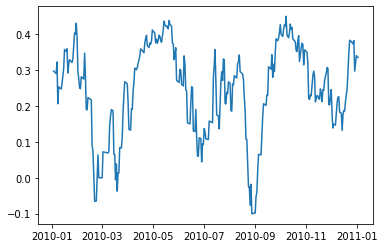

,TIMESTAMP_TZ,STRENGTH
27808,2010-10-07 15:30:00,0.44994


In [ ]:
subset = data_file[data_file["ENTITY_NAME"]=="Amazon.com Inc."][["TIMESTAMP_TZ","STRENGTH"]]

plt.plot(subset["TIMESTAMP_TZ"], subset["STRENGTH"])
plt.show()

subset[subset["STRENGTH"]==subset["STRENGTH"].max()]

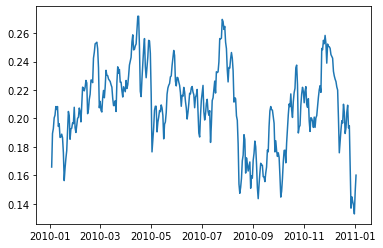

,TIMESTAMP_TZ,STRENGTH
10481,2010-04-16 15:30:00,0.27187


In [ ]:
subset = data_file[data_file["ENTITY_NAME"]=="Rollup of data for all entities"][["TIMESTAMP_TZ","STRENGTH"]]

plt.plot(subset["TIMESTAMP_TZ"], subset["STRENGTH"])
plt.show()

subset[subset["STRENGTH"]==subset["STRENGTH"].max()]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


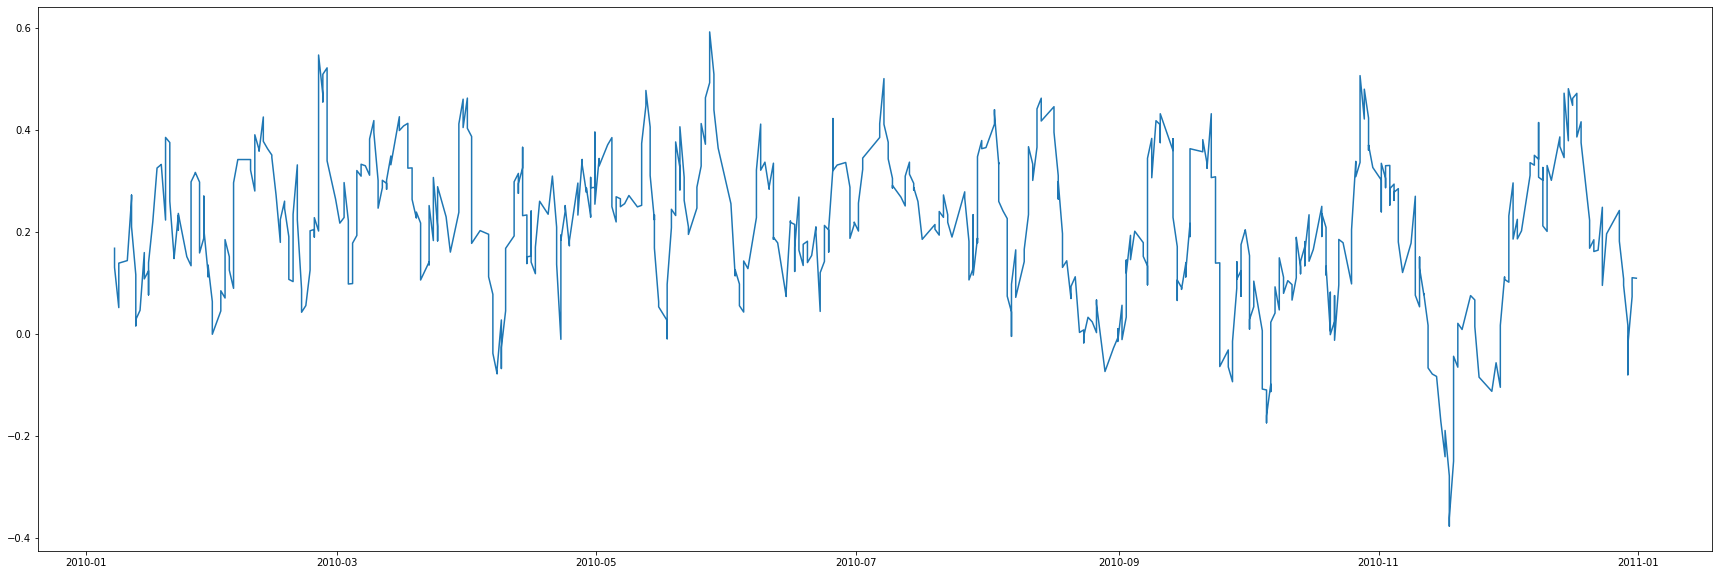

,TIMESTAMP_TZ,AVG,AVG_smooth
3256,2010-04-15 15:30:00,1.0,0.233013
3485,2010-04-22 15:30:00,1.0,0.135857
3526,2010-04-23 15:30:00,1.0,0.240000
5300,2010-06-16 15:30:00,1.0,0.169800
5771,2010-07-02 15:30:00,1.0,0.322714
7757,2010-09-07 15:30:00,1.0,0.284385
8514,2010-09-29 15:30:00,1.0,0.175333
9390,2010-10-26 15:30:00,1.0,0.338361
9445,2010-10-27 15:30:00,1.0,0.482391
10868,2010-12-08 15:30:00,1.0,0.414250


In [ ]:
subset = data_sectorial_Energy_oil_gas[["TIMESTAMP_TZ","AVG"]]

subset["AVG_smooth"] = subset["AVG"].rolling(10).mean()

plt.plot(subset["TIMESTAMP_TZ"], subset["AVG_smooth"])
plt.show()

subset[subset["AVG"]==subset["AVG"].max()]

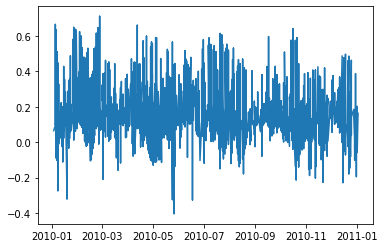

,TIMESTAMP_TZ,STRENGTH
1764,2010-02-26 15:30:00,0.71146


In [ ]:
subset = data_sectorial_Energy_oil_gas[["TIMESTAMP_TZ","STRENGTH"]]

plt.plot(subset["TIMESTAMP_TZ"], subset["STRENGTH"])
plt.show()

subset[subset["STRENGTH"]==subset["STRENGTH"].max()]

*Comparar con GDP
*Probar con NASDAQ?
*VIX Volatility Index
*Noticias 2010: BP Oil spill, terremoto haiti, Obama election...
*Noticias 2010 finanzas: créditos? tipos de interés? fin de la crisis en UK?, Berkshire Hathaway to join S&P 500 https://www.reuters.com/article/us-berkshire-sp500-idUSTRE60P6OO20100126
*Meter análsis de correlación con precios stock/tests estadisticos
*Si hay tiempo, meter una red compleja con correlaciones

Correlaciones Oil-Gas

In [ ]:
data_sectorial_Energy_oil_gas

,TIMESTAMP_TZ,RP_ENTITY_ID,ENTITY_NAME,BUZZ,STRENGTH,AVG,STDDEV,Security,Symbol,SEC filings,GICS Sector,GICS Sub-Industry
2,2010-01-02 15:30:00,990AD0,Bank of America Corp.,-0.65243,0.06494,-0.53000,0.00000,Bank of America,BAC,reports,Financials,Diversified Banks
21,2010-01-04 15:30:00,50070E,Goldman Sachs Group Inc.,-0.07157,0.09485,-0.06800,0.30374,Goldman Sachs,GS,reports,Financials,Investment Banking & Brokerage
22,2010-01-04 15:30:00,619882,JPMorgan Chase & Co.,5.03196,0.14918,0.17216,0.05546,JPMorgan Chase,JPM,reports,Financials,Diversified Banks
24,2010-01-04 15:30:00,9196A2,Morgan Stanley & Co. LLC,1.14817,0.30253,0.90556,0.12571,Morgan Stanley,MS,reports,Financials,Investment Banking & Brokerage
27,2010-01-04 15:30:00,61B81B,PNC Financial Services Group Inc.,0.78756,0.66531,0.95000,0.00000,PNC Financial Services,PNC,reports,Financials,Regional Banks
...,...,...,...,...,...,...,...,...,...,...,...,...
11558,2010-12-30 15:30:00,E8846E,Wells Fargo & Co.,-0.55206,0.00619,-0.42000,0.00000,Wells Fargo,WFC,reports,Financials,Diversified Banks
11569,2010-12-31 15:30:00,50070E,Goldman Sachs Group Inc.,-0.60921,0.20219,0.49000,0.00000,Goldman Sachs,GS,reports,Financials,Investment Banking & Brokerage
11570,2010-12-31 15:30:00,619882,JPMorgan Chase & Co.,0.43775,0.13688,0.22455,0.30604,JPMorgan Chase,JPM,reports,Financials,Diversified Banks
11581,2010-12-31 15:30:00,E8846E,Wells Fargo & Co.,-0.55394,-0.05845,-0.55000,0.00000,Wells Fargo,WFC,reports,Financials,Diversified Banks


In [ ]:
data_sectorial_Energy_oil_gas_pivot = pd.pivot_table(data_sectorial_Energy_oil_gas, values='BUZZ', index=['TIMESTAMP_TZ'], columns=['ENTITY_NAME'], aggfunc=np.mean)
#data_sectorial_Energy_oil_gas_pivot = data_sectorial_Energy_oil_gas_pivot.interpolate(method='linear', limit_direction='both')
data_sectorial_Energy_oil_gas_pivot

ENTITY_NAME,Aon PLC,Bank of America Corp.,Chubb Ltd.,Goldman Sachs Group Inc.,Intercontinental Exchange Inc.,JPMorgan Chase & Co.,Marsh & McLennan Cos. Inc.,Morgan Stanley & Co. LLC,PNC Financial Services Group Inc.,Progressive Corp.,U.S. Bancorp,Wells Fargo & Co.
TIMESTAMP_TZ,,,,,,,,,,,,
2010-01-02 15:30:00,NaN,-0.65243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04 15:30:00,NaN,NaN,NaN,-0.07157,NaN,5.03196,NaN,1.14817,0.78756,NaN,NaN,-0.43696
2010-01-05 15:30:00,NaN,-0.46663,3.10281,0.05988,1.81494,7.90823,NaN,0.00000,0.01146,NaN,NaN,-0.43427
2010-01-06 15:30:00,NaN,NaN,NaN,0.58201,0.81108,7.60069,1.12325,0.75235,0.27948,NaN,NaN,-0.42483
2010-01-07 15:30:00,NaN,-0.07197,NaN,0.69910,0.14980,2.51091,0.28197,0.92294,NaN,0.49398,0.13088,0.09895
...,...,...,...,...,...,...,...,...,...,...,...,...
2010-12-28 15:30:00,NaN,-0.06660,NaN,NaN,0.10260,0.72711,NaN,NaN,0.34648,NaN,NaN,NaN
2010-12-29 15:30:00,NaN,-0.06153,1.33298,-0.61384,NaN,1.07381,NaN,NaN,NaN,NaN,1.23033,-0.05206
2010-12-30 15:30:00,NaN,0.01538,NaN,0.44541,0.09931,0.57240,NaN,0.30681,NaN,NaN,NaN,-0.55206


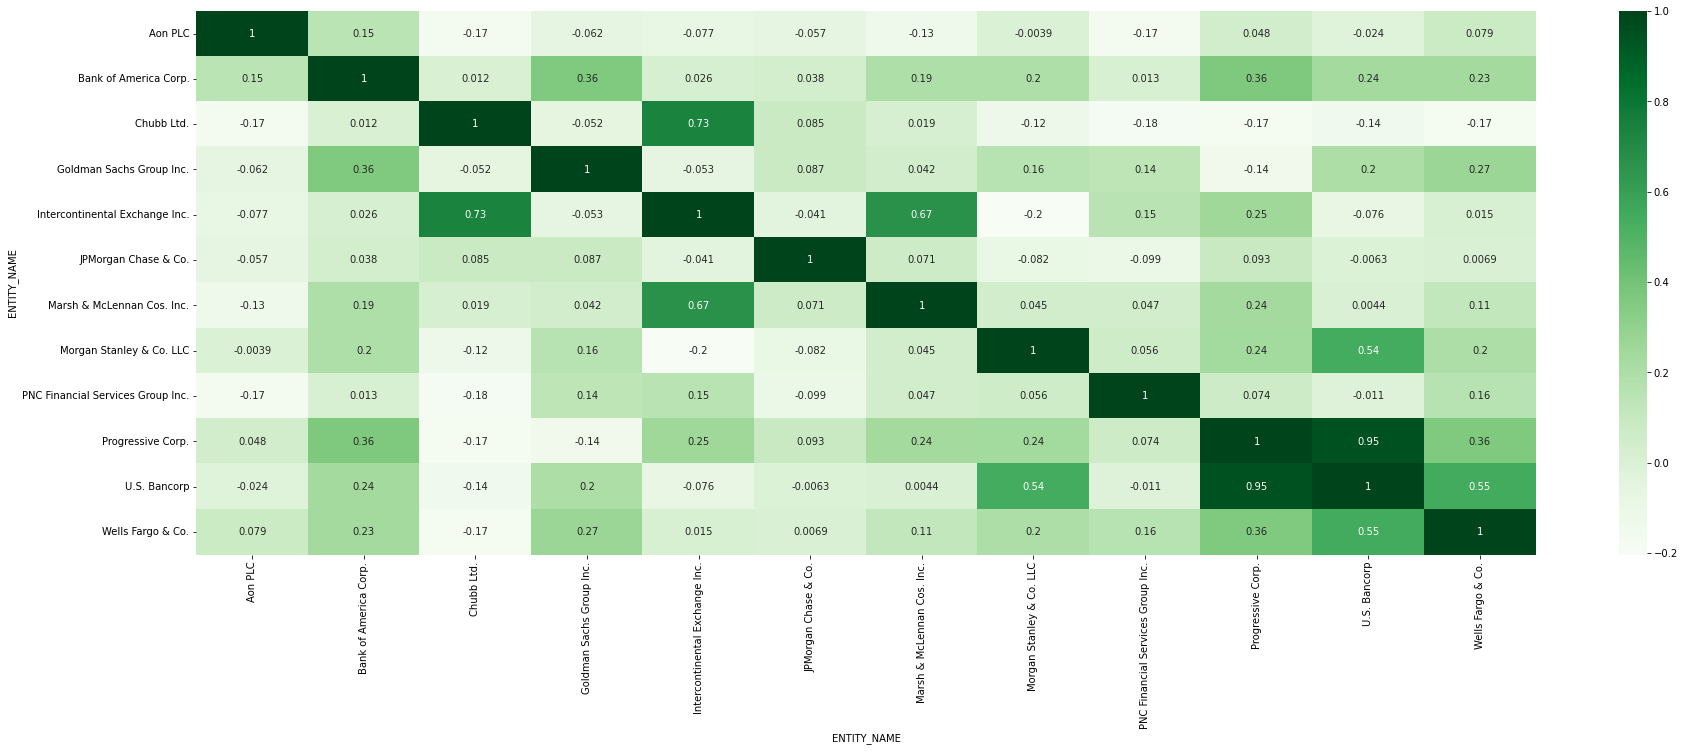

In [ ]:
corrMatrix = data_sectorial_Energy_oil_gas_pivot.corr() #Resultados buenos para Financial y Buzz y sin interpolar...
sn.heatmap(corrMatrix, annot=True, cmap="Greens") #Greens #Spectral
plt.rcParams['figure.figsize'] = [30, 10]
plt.show()

https://aiolux.com/contrasts/side-by-side?scroll=quick_comparison&symbol_arr=CB%2CICE&time_span=20y
https://aiolux.com/contrasts/side-by-side?relative_performance=true&scroll=quick_comparison&symbol_arr=PGR%2CUSB&time_span=20y

In [ ]:
#VOL_comp.to_excel(r'/content/drive/MyDrive/RavenPack/VOL_comparation.xlsx', index = True)



---
# Sectorial comparation Buzz & Strength


In [ ]:
data_sectorial_Energy_oil_gas = data_sectorial[data_sectorial["GICS Sector"]=="Financials"]
data_sectorial_Energy_oil_gas

,TIMESTAMP_TZ,RP_ENTITY_ID,ENTITY_NAME,BUZZ,STRENGTH,AVG,STDDEV,Security,Symbol,SEC filings,GICS Sector,GICS Sub-Industry
0,2010-01-02 15:30:00,251988,AT&T Inc.,-0.66865,0.28634,0.210,0.000,Apple Inc.,AAPL,reports,Information Technology,"Technology Hardware, Storage & Peripherals"
1,2010-01-02 15:30:00,D8442A,Apple Inc.,-0.47339,0.12442,-0.180,0.000,Apple Inc.,AAPL,reports,Information Technology,"Technology Hardware, Storage & Peripherals"
2,2010-01-02 15:30:00,990AD0,Bank of America Corp.,-0.65243,0.06494,-0.530,0.000,Bank of America,BAC,reports,Financials,Diversified Banks
3,2010-01-02 15:30:00,228D42,Microsoft Corp.,-0.73079,0.16394,0.310,0.000,Microsoft,MSFT,reports,Information Technology,Systems Software
4,2010-01-03 15:30:00,4A6F00,Alphabet Inc.,-0.72487,0.11779,0.560,0.000,Alphabet Inc. (Class C),GOOG,reports,Communication Services,Interactive Media & Services
...,...,...,...,...,...,...,...,...,...,...,...,...
11587,2011-01-01 15:30:00,619882,JPMorgan Chase & Co.,-0.78804,0.16368,0.440,0.000,JPMorgan Chase,JPM,reports,Financials,Diversified Banks
11588,2011-01-01 15:30:00,55C9B5,Mastercard Inc.,0.05639,0.22536,0.525,0.035,Mastercard,MA,reports,Information Technology,Data Processing & Outsourced Services
11589,2011-01-01 15:30:00,2E61CC,Procter & Gamble Co.,-0.16240,0.23294,0.520,0.000,Procter & Gamble,PG,reports,Consumer Staples,Personal Products
11590,2011-01-01 15:30:00,205AD5,UnitedHealth Group Inc.,0.28166,-0.16917,0.090,0.000,UnitedHealth Group,UNH,reports,Health Care,Managed Health Care


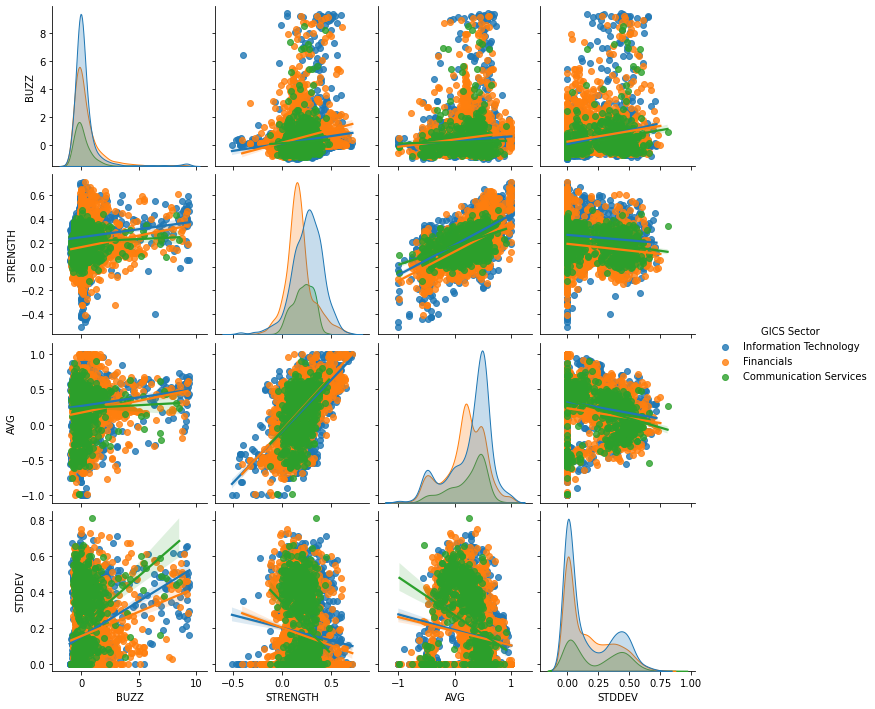

In [ ]:
sn.pairplot(data_sectorial[data_sectorial["GICS Sector"].isin(["Information Technology", "Communication Services", "Financials"])], kind="reg", hue = 'GICS Sector')

In [ ]:
data_sectorial[data_sectorial["GICS Sector"].isin(["Information Technology", "Communication Services", "Financials"])].corr()

,BUZZ,STRENGTH,AVG,STDDEV
BUZZ,1.000000,0.126957,0.094058,0.243982
STRENGTH,0.126957,1.000000,0.603705,-0.143728
AVG,0.094058,0.603705,1.000000,-0.182253
STDDEV,0.243982,-0.143728,-0.182253,1.000000


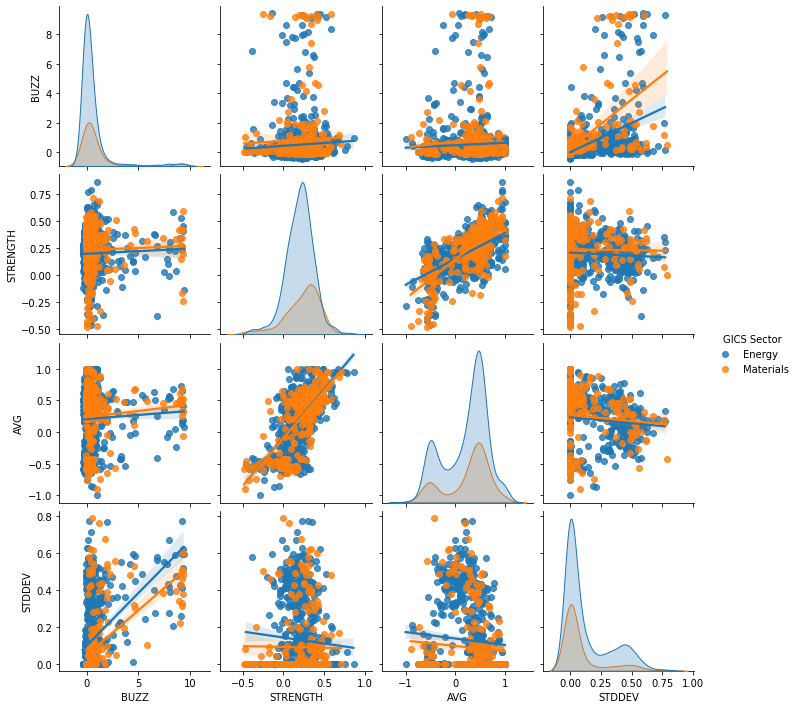

In [ ]:
sn.pairplot(data_sectorial[data_sectorial["GICS Sector"].isin(["Energy", "Materials"])], kind="reg", hue = 'GICS Sector')

In [ ]:
data_sectorial[data_sectorial["GICS Sector"].isin(["Energy", "Materials"])].corr()

,BUZZ,STRENGTH,AVG,STDDEV
BUZZ,1.000000,0.046896,0.063960,0.484046
STRENGTH,0.046896,1.000000,0.645818,-0.052106
AVG,0.063960,0.645818,1.000000,-0.082992
STDDEV,0.484046,-0.052106,-0.082992,1.000000


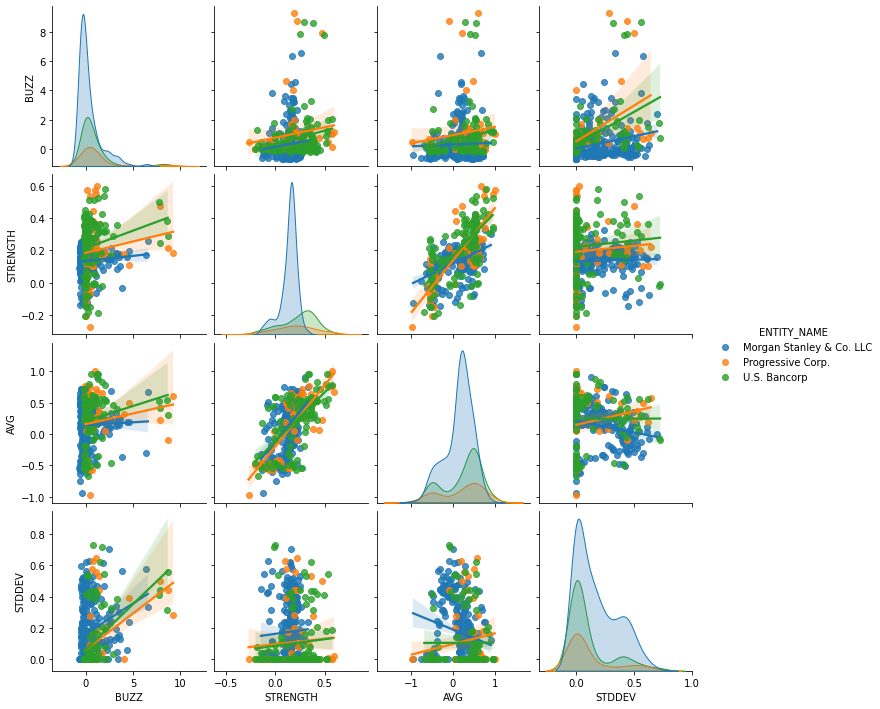

In [ ]:
sn.pairplot(data_sectorial[data_sectorial["ENTITY_NAME"].isin(["U.S. Bancorp", "Progressive Corp.", "Morgan Stanley & Co. LLC"])], kind="reg", hue = 'ENTITY_NAME')

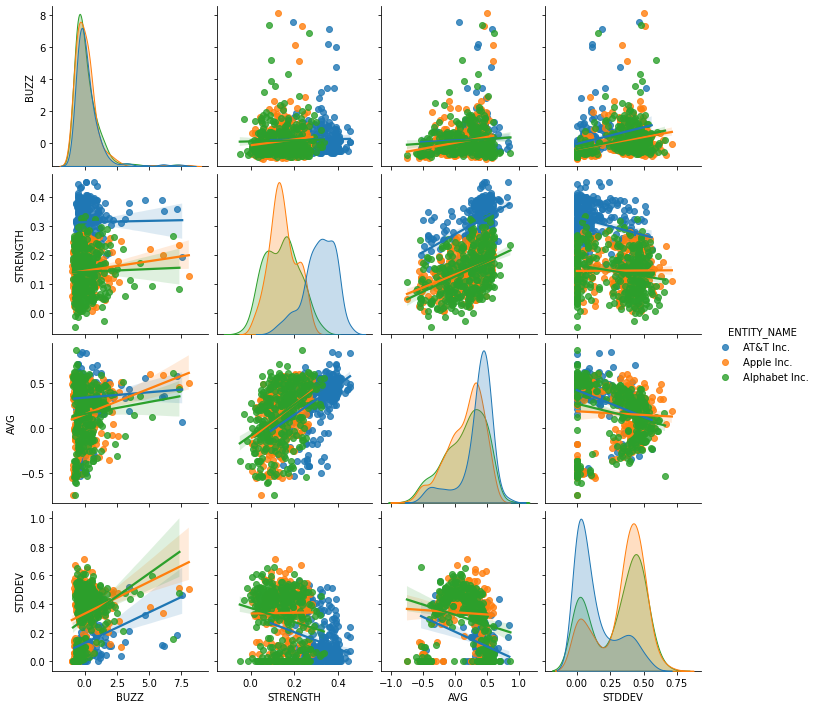

In [ ]:
sn.pairplot(data_sectorial[data_sectorial["ENTITY_NAME"].isin(["Alphabet Inc.", "Apple Inc.", "AT&T Inc."])], kind="reg", hue = 'ENTITY_NAME')

# Comparation VIX

In [ ]:
VOL_SP500 = pd.read_csv('/content/drive/MyDrive/RavenPack/VolatilitySP500.txt', sep = ";")
VOL_SP500["Fecha"] = pd.to_datetime(VOL_SP500["Fecha"])
VOL_SP500["Fecha_dt"] = pd.to_datetime(VOL_SP500["Fecha"].dt.date)
VOL_SP500 = VOL_SP500.dropna()
VOL_SP500 = VOL_SP500[["Fecha_dt", "Último"]]

VOL_SP500["Último"] = VOL_SP500["Último"].str.replace(".", "")
VOL_SP500["Último"] = VOL_SP500["Último"].str.replace(",", ".")
VOL_SP500["Último"] = VOL_SP500["Último"].astype(float)

VOL_SP500

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


,Fecha_dt,Último
0,2010-12-31,17.75
1,2010-12-30,17.52
2,2010-12-29,17.28
3,2010-12-28,17.52
4,2010-12-27,17.67
...,...,...
247,2010-08-01,18.13
248,2010-07-01,19.06
249,2010-06-01,19.16
250,2010-05-01,19.35


In [ ]:
subset_vol = data_file[data_file["ENTITY_NAME"]=="Rollup of data for all entities"][["TIMESTAMP_TZ","BUZZ", "STRENGTH","STDDEV", "AVG"]]
subset_vol["Fecha_dt"] = pd.to_datetime(subset_vol["TIMESTAMP_TZ"].dt.date)

VOL_comp = pd.merge(VOL_SP500, subset_vol)
VOL_comp = VOL_comp.sort_values(by="Fecha_dt")
VOL_comp

,Fecha_dt,Último,TIMESTAMP_TZ,BUZZ,STRENGTH,STDDEV,AVG
232,2010-01-02,22.59,2010-01-02 15:30:00,-1.19259,0.16578,0.36759,0.06000
213,2010-01-03,19.26,2010-01-03 15:30:00,-1.18332,0.18940,0.09933,0.50000
190,2010-01-04,17.47,2010-01-04 15:30:00,-0.10343,0.19281,0.51503,0.25358
149,2010-01-06,35.54,2010-01-06 15:30:00,1.50047,0.20225,0.30607,0.24486
127,2010-01-07,32.86,2010-01-07 15:30:00,0.90560,0.20833,0.35224,0.30354
...,...,...,...,...,...,...,...
4,2010-12-27,17.67,2010-12-27 15:30:00,-0.86072,0.14482,0.38051,0.25692
3,2010-12-28,17.52,2010-12-28 15:30:00,-0.74835,0.14159,0.39992,0.11511
2,2010-12-29,17.28,2010-12-29 15:30:00,-0.75769,0.13889,0.44550,0.11868
1,2010-12-30,17.52,2010-12-30 15:30:00,-0.64769,0.13281,0.43081,0.07019


In [ ]:
VOL_comp_AVG_neutral = VOL_comp[(VOL_comp["AVG"]>-0.20)&(VOL_comp["AVG"]<0.20)]
VOL_comp_AVG_positive = VOL_comp[VOL_comp["AVG"]>=0.20]
VOL_comp_AVG_negative = VOL_comp[VOL_comp["AVG"]<=-0.20]

,Fecha_dt,Último,TIMESTAMP_TZ,BUZZ,STRENGTH,STDDEV,AVG,Último_norm,BUZZ_norm
228,2010-05-02,26.11,2010-05-02 15:30:00,-1.19897,0.17644,0.49934,-0.31583,0.266645,0.267849


In [ ]:
VOL_comp_AVG_positive["STRENGTH_smooth"] = VOL_comp_AVG_positive["STRENGTH"].rolling(10).mean()
VOL_comp_AVG_positive = VOL_comp_AVG_positive.dropna()

212    0.20076
126    0.21063
106    0.22199
83     0.22124
41     0.22186
        ...   
8      0.19343
7      0.20436
6      0.20928
4      0.14482
0      0.14857
Name: STRENGTH, Length: 174, dtype: float64

In [ ]:
stats.pearsonr(VOL_comp_AVG_positive["STRENGTH_smooth"], VOL_comp_AVG_positive["Último"])

212    0.195989
126    0.199325
106    0.202502
83     0.204137
41     0.207072
         ...   
8      0.213706
7      0.209778
6      0.206468
4      0.198192
0      0.190458
Name: STRENGTH_smooth, Length: 174, dtype: float64

In [ ]:
VOL_shift = VOL_comp_AVG_positive.copy()

for i in range(1,10):

  VOL_shift['BUZZ_S'] = VOL_shift['BUZZ'].shift(1)
  VOL_shift['STRENGTH_S'] = VOL_shift['STRENGTH'].shift(1)

  VOL_shift = VOL_shift.dropna()

  print(stats.pearsonr(VOL_shift["BUZZ_S"], VOL_shift["Último"]))
  print(stats.pearsonr(VOL_shift["STRENGTH_S"], VOL_shift["Último"]))
  #print(VOL_shift)

(0.021373052868064978, 0.769158321546872)
(-0.15554987842203752, 0.03165606705054621)
(0.012640434890698202, 0.8625779274004823)
(-0.1614730836767276, 0.02603485242812667)
(0.02126089266025166, 0.7715234447219066)
(-0.15318550601232686, 0.03534197867646011)
(0.012107435809602392, 0.8690166584421478)
(-0.14949669454710077, 0.040594695977945246)
(0.011700710647394582, 0.8737181971556712)
(-0.14919967786573618, 0.041548327080142285)
(0.010489863063136602, 0.8869993293853304)
(-0.149488267004335, 0.041704024215863465)
(0.006208327297086844, 0.9331591168075478)
(-0.15366719629146833, 0.03676596281185545)
(0.003176599393132083, 0.9658641915314987)
(-0.16022252599778716, 0.029809781597321776)
(0.0009515834926757906, 0.9897996595949083)
(-0.16651798130992682, 0.024263493449366395)


In [ ]:
x = VOL_comp[["Último"]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

VOL_comp["Último_norm"] = df

In [ ]:
y = VOL_comp[["BUZZ"]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(y)
dfy = pd.DataFrame(x_scaled)

VOL_comp["BUZZ_norm"] = dfy

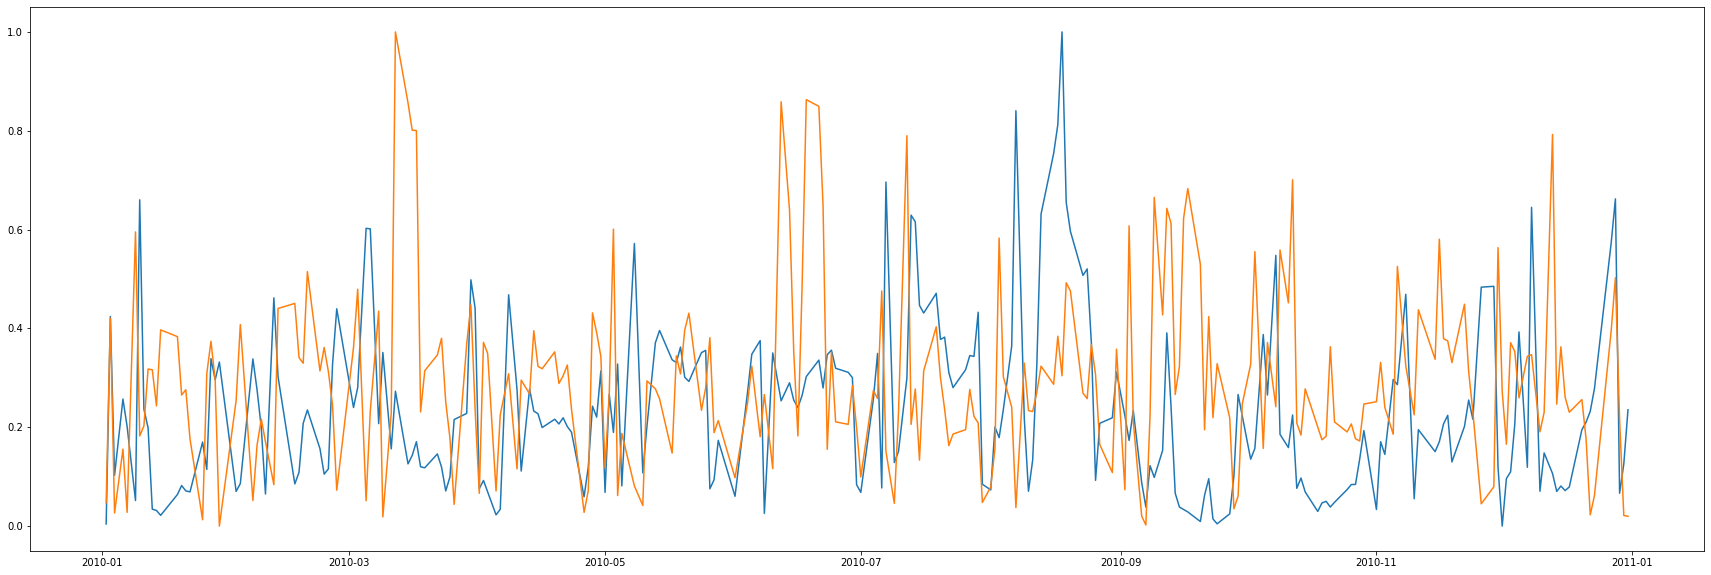

In [ ]:
#subset = subset[(subset["Fecha_dt"]>'2010-10-03')]
#subset = subset[(subset["Fecha_dt"]<'2010-10-11')]

VOL_comp = VOL_comp.sort_values(by="Fecha_dt")

plt.plot(VOL_comp["Fecha_dt"], VOL_comp["Último_norm"])
plt.plot(VOL_comp["Fecha_dt"], VOL_comp["BUZZ_norm"])
plt.show()

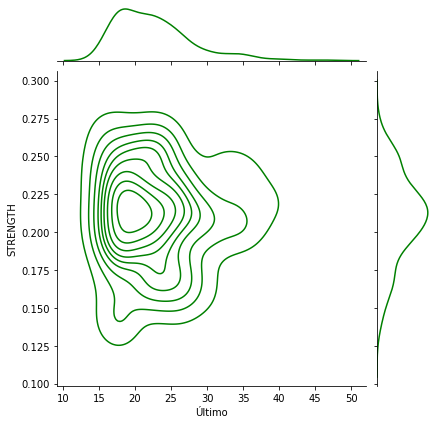

In [ ]:
sn.jointplot(x = "Último", y="STRENGTH", data=VOL_comp, color = "green", kind="kde")

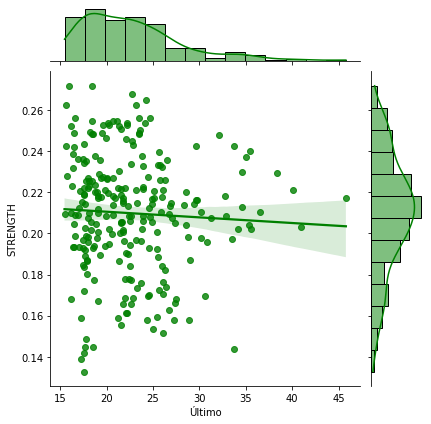

In [ ]:
sn.jointplot(x = "Último", y="STRENGTH", data=VOL_comp, color = "green", kind="reg")

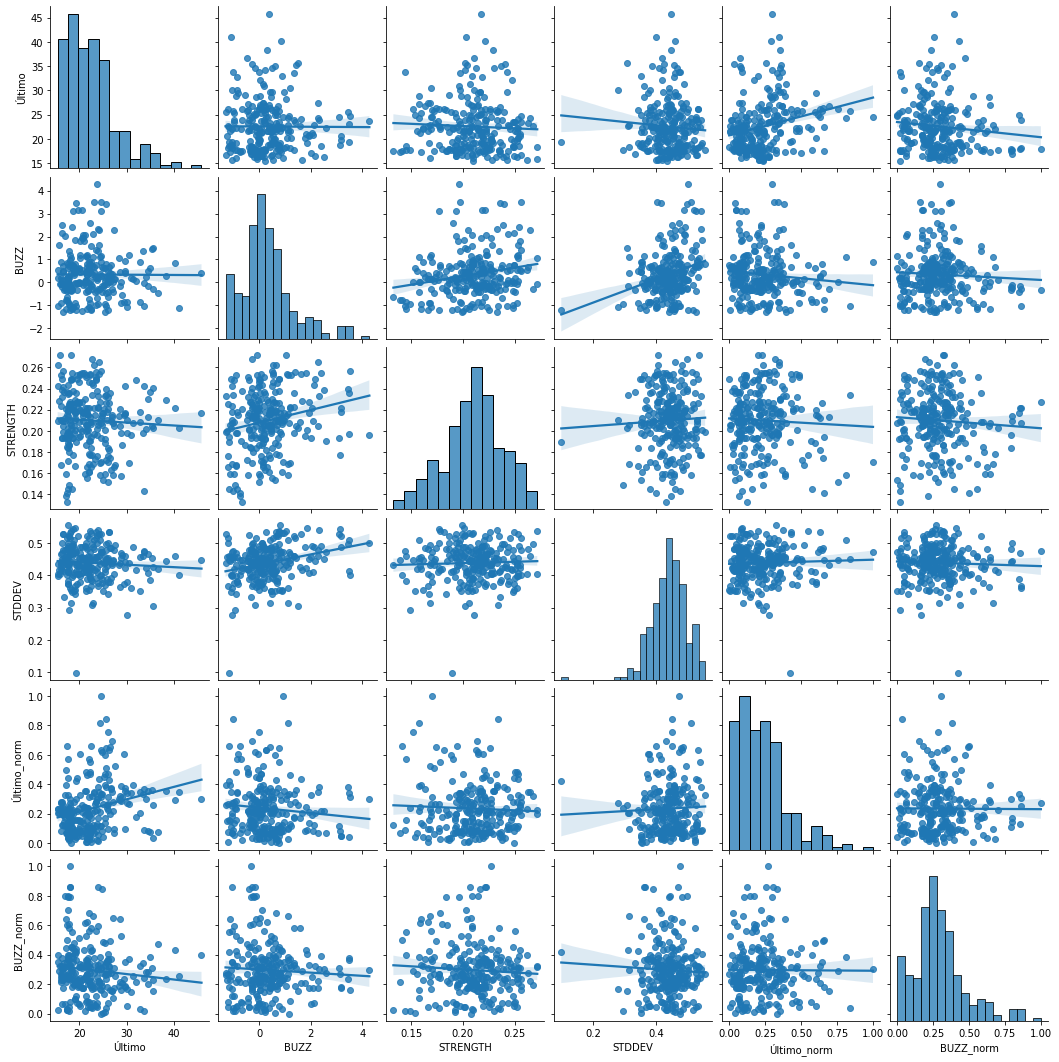

In [ ]:
sn.pairplot(VOL_comp, kind="reg")

In [ ]:
VOL_comp.corr()

,Fecha_dt,Último,TIMESTAMP_TZ,BUZZ,STRENGTH,STDDEV,Último_norm,BUZZ_norm
232,2010-01-02,22.59,2010-01-02 15:30:00,-1.19259,0.16578,0.36759,0.004285,0.047378
213,2010-01-03,19.26,2010-01-03 15:30:00,-1.18332,0.18940,0.09933,0.424192,0.420867
190,2010-01-04,17.47,2010-01-04 15:30:00,-0.10343,0.19281,0.51503,0.102835,0.026515
149,2010-01-06,35.54,2010-01-06 15:30:00,1.50047,0.20225,0.30607,0.257086,0.155655
127,2010-01-07,32.86,2010-01-07 15:30:00,0.90560,0.20833,0.35224,0.201384,0.027822
...,...,...,...,...,...,...,...,...
4,2010-12-27,17.67,2010-12-27 15:30:00,-0.86072,0.14482,0.38051,0.573830,0.396006
3,2010-12-28,17.52,2010-12-28 15:30:00,-0.74835,0.14159,0.39992,0.662162,0.502662
2,2010-12-29,17.28,2010-12-29 15:30:00,-0.75769,0.13889,0.44550,0.066579,0.215096
1,2010-12-30,17.52,2010-12-30 15:30:00,-0.64769,0.13281,0.43081,0.125577,0.021481


(array([68., 51., 60., 40., 13.,  6., 10.,  1.,  2.,  1.]),
 array([15.45 , 18.484, 21.518, 24.552, 27.586, 30.62 , 33.654, 36.688,
        39.722, 42.756, 45.79 ]),
 <a list of 10 Patch objects>)

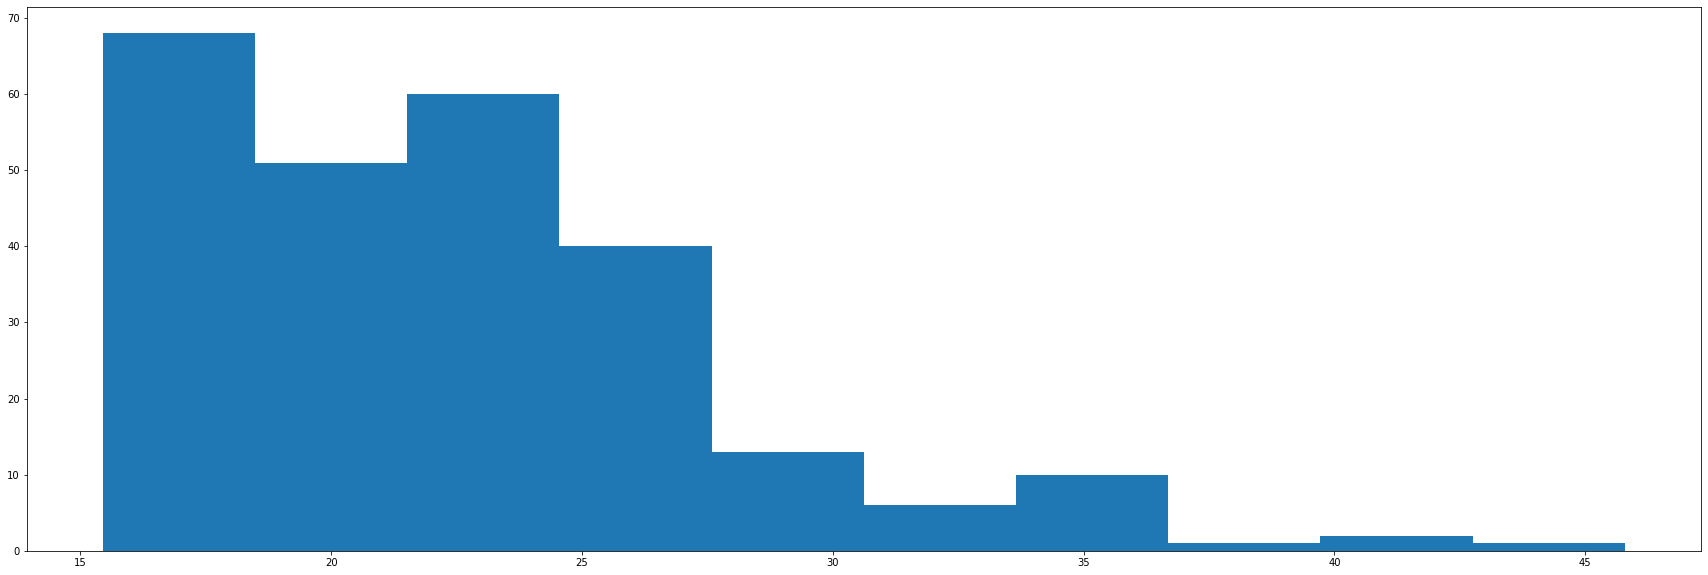

In [ ]:
plt.hist(VOL_comp["Último"])

(array([ 6., 10., 19., 16., 41., 51., 51., 25., 27.,  6.]),
 array([0.13281 , 0.146716, 0.160622, 0.174528, 0.188434, 0.20234 ,
        0.216246, 0.230152, 0.244058, 0.257964, 0.27187 ]),
 <a list of 10 Patch objects>)

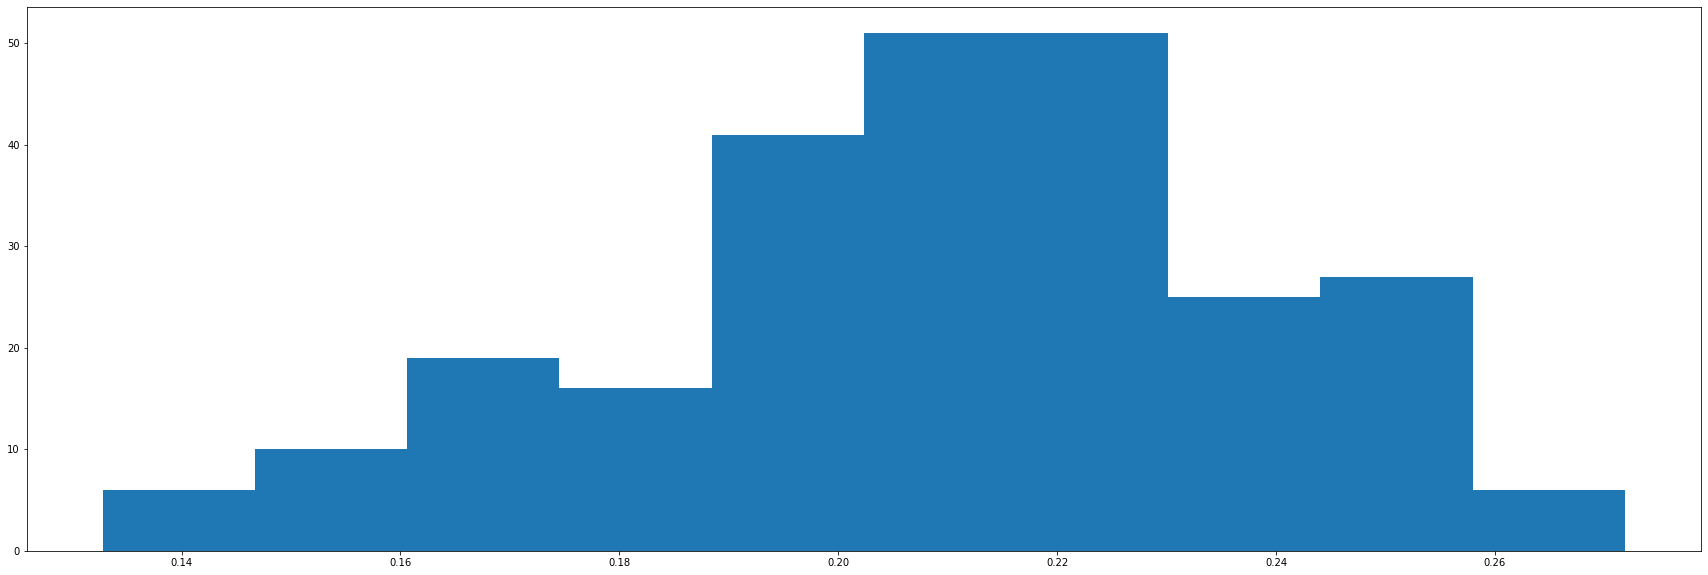

In [ ]:
plt.hist(VOL_comp["STRENGTH"])

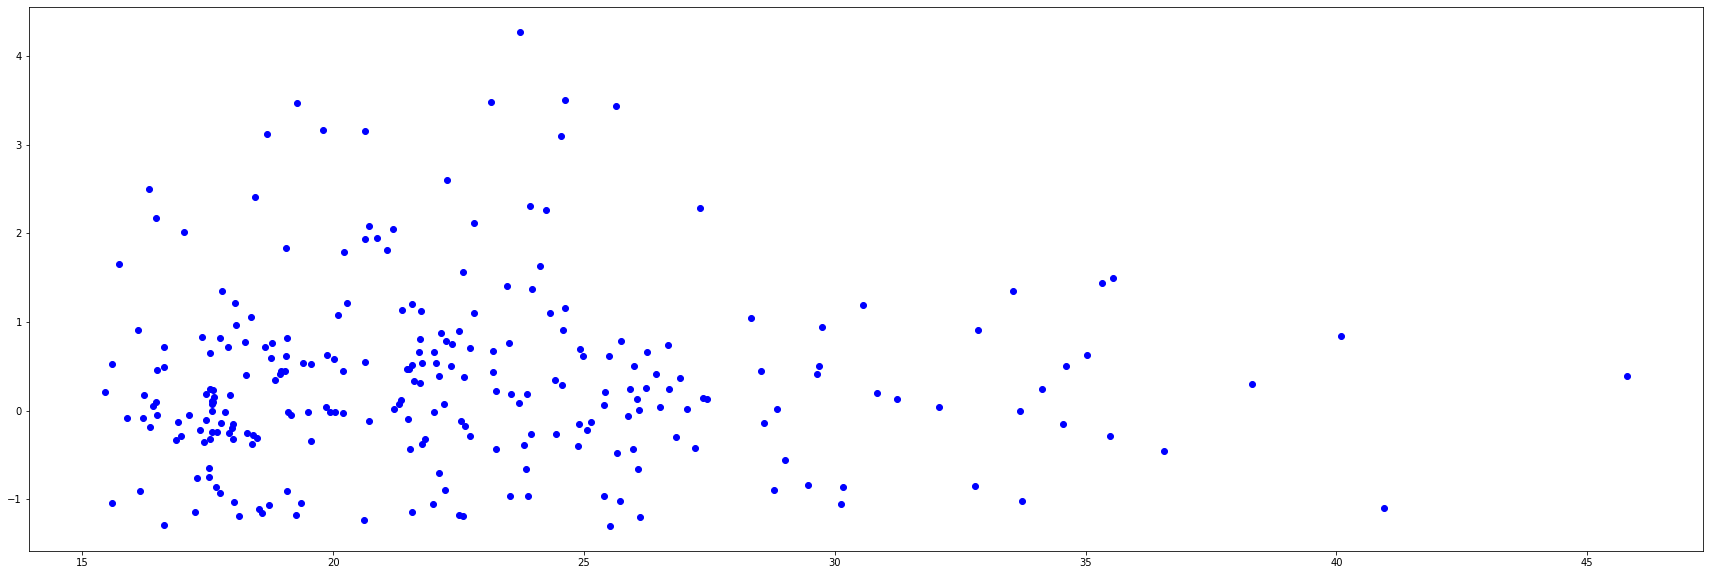

In [ ]:
plt.scatter(VOL_comp["Último"], VOL_comp["BUZZ"], c ="blue")
plt.show()

# Delayed Correlation

In [ ]:
stats.pearsonr((VOL_comp["STRENGTH"]-VOL_comp["STRENGTH"].mean())/(VOL_comp["STRENGTH"].std()), (np.log(VOL_comp["Último"])-VOL_comp["Último"].mean())/VOL_comp["Último"].std())

,Fecha_dt,Último,TIMESTAMP_TZ,BUZZ,STRENGTH,STDDEV,Último_norm,BUZZ_norm
232,2010-01-02,22.59,2010-01-02 15:30:00,-1.19259,0.16578,0.36759,0.004285,0.047378
213,2010-01-03,19.26,2010-01-03 15:30:00,-1.18332,0.18940,0.09933,0.424192,0.420867
190,2010-01-04,17.47,2010-01-04 15:30:00,-0.10343,0.19281,0.51503,0.102835,0.026515
149,2010-01-06,35.54,2010-01-06 15:30:00,1.50047,0.20225,0.30607,0.257086,0.155655
127,2010-01-07,32.86,2010-01-07 15:30:00,0.90560,0.20833,0.35224,0.201384,0.027822
...,...,...,...,...,...,...,...,...
4,2010-12-27,17.67,2010-12-27 15:30:00,-0.86072,0.14482,0.38051,0.573830,0.396006
3,2010-12-28,17.52,2010-12-28 15:30:00,-0.74835,0.14159,0.39992,0.662162,0.502662
2,2010-12-29,17.28,2010-12-29 15:30:00,-0.75769,0.13889,0.44550,0.066579,0.215096
1,2010-12-30,17.52,2010-12-30 15:30:00,-0.64769,0.13281,0.43081,0.125577,0.021481


In [ ]:
VOL_comp.head(11)

,Fecha_dt,Último,TIMESTAMP_TZ,BUZZ,STRENGTH,STDDEV,AVG,Último_norm,BUZZ_norm
232,2010-01-02,22.59,2010-01-02 15:30:00,-1.19259,0.16578,0.36759,0.06000,0.004285,0.047378
213,2010-01-03,19.26,2010-01-03 15:30:00,-1.18332,0.18940,0.09933,0.50000,0.424192,0.420867
190,2010-01-04,17.47,2010-01-04 15:30:00,-0.10343,0.19281,0.51503,0.25358,0.102835,0.026515
149,2010-01-06,35.54,2010-01-06 15:30:00,1.50047,0.20225,0.30607,0.24486,0.257086,0.155655
127,2010-01-07,32.86,2010-01-07 15:30:00,0.90560,0.20833,0.35224,0.30354,0.201384,0.027822
84,2010-01-09,23.89,2010-01-09 15:30:00,-0.95960,0.20834,0.37521,0.25350,0.051747,0.595305
63,2010-01-10,22.50,2010-01-10 15:30:00,-1.17643,0.19437,0.44779,0.04000,0.660185,0.182467
42,2010-01-11,21.83,2010-01-11 15:30:00,-0.31695,0.19627,0.43261,0.23842,0.236651,0.202472
21,2010-01-12,21.36,2010-01-12 15:30:00,0.12468,0.18660,0.49852,0.08470,0.198748,0.317877
244,2010-01-13,17.85,2010-01-13 15:30:00,-0.01800,0.18691,0.48229,0.20870,0.034278,0.316311


In [ ]:
VOL_comp_delayed = VOL_comp_AVG_neutral.copy()

for i in range(1,20):

  VOL_comp_delayed["STRENGTH"] = VOL_comp_delayed["STRENGTH"].shift(1)
  VOL_comp_delayed = VOL_comp_delayed.dropna()

  #print(stats.pearsonr(VOL_comp_delayed["STRENGTH"], VOL_comp_delayed["Último"]))
  print("Corr Transformed")
  print(stats.pearsonr((VOL_comp_delayed["STRENGTH"]-VOL_comp_delayed["STRENGTH"].mean())/(VOL_comp_delayed["STRENGTH"].std()), (np.log(VOL_comp_delayed["Último"])-VOL_comp_delayed["Último"].mean())/VOL_comp_delayed["Último"].std()))
  print("Corr")
  print(stats.pearsonr(VOL_comp_delayed["STRENGTH"],VOL_comp_delayed["Último"]))
  print("Corr Transformed inv")
  print(stats.pearsonr((VOL_comp_delayed["Último"]-VOL_comp_delayed["Último"].mean())/(VOL_comp_delayed["Último"].std()), (np.log(VOL_comp_delayed["STRENGTH"])-VOL_comp_delayed["STRENGTH"].mean())/VOL_comp_delayed["STRENGTH"].std()))
  print("*****")
  #print(VOL_comp_delayed)
  #print(VOL_comp_delayed)

Corr Transformed
(-0.04166834911903666, 0.7561324164722585)
Corr
(-0.04578139847525552, 0.7329155029651472)
Corr Transformed inv
(-0.021203065263491243, 0.8744723474145641)
*****
Corr Transformed
(0.02117535403304576, 0.8757602821783524)
Corr
(0.02529214632249426, 0.8518559630663981)
Corr Transformed inv
(0.03563704166675247, 0.7924144971001633)
*****
Corr Transformed
(0.03315698722688452, 0.808319503954295)
Corr
(0.042256267856543225, 0.7571518805305316)
Corr Transformed inv
(0.04335192851377317, 0.7510551917227781)
*****
Corr Transformed
(-0.06665057937885263, 0.6287558329550974)
Corr
(-0.0674593281499059, 0.6245877593546583)
Corr Transformed inv
(-0.0731700020938118, 0.595493709492477)
*****
Corr Transformed
(0.054092894131652726, 0.6976582092125732)
Corr
(0.06499358336328802, 0.640555548481472)
Corr Transformed inv
(0.04461442828923598, 0.7487135968816734)
*****
Corr Transformed
(0.1719460469593089, 0.21827395581754785)
Corr
(0.1758552896455724, 0.20782785442447868)
Corr Transforme

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
VOL_comp_delayed = VOL_comp_AVG_positive.copy()

for i in range(1,20):

  VOL_comp_delayed["STRENGTH"] = VOL_comp_delayed["STRENGTH"].shift(1)
  VOL_comp_delayed = VOL_comp_delayed.dropna()

  #print(stats.pearsonr(VOL_comp_delayed["STRENGTH"], VOL_comp_delayed["Último"]))
  print("Corr Transformed")
  print(stats.pearsonr((VOL_comp_delayed["STRENGTH"]-VOL_comp_delayed["STRENGTH"].mean())/(VOL_comp_delayed["STRENGTH"].std()), (np.log(VOL_comp_delayed["Último"])-VOL_comp_delayed["Último"].mean())/VOL_comp_delayed["Último"].std()))
  print("Corr")
  print(stats.pearsonr(VOL_comp_delayed["STRENGTH"],VOL_comp_delayed["Último"]))
  print("Corr Transformed inv")
  print(stats.pearsonr((VOL_comp_delayed["Último"]-VOL_comp_delayed["Último"].mean())/(VOL_comp_delayed["Último"].std()), (np.log(VOL_comp_delayed["STRENGTH"])-VOL_comp_delayed["STRENGTH"].mean())/VOL_comp_delayed["STRENGTH"].std()))
  print("*****")
  #print(VOL_comp_delayed)
  #print(VOL_comp_delayed)

Corr Transformed
(-0.17526586479037676, 0.015303159066668851)
Corr
(-0.15554987842203752, 0.03165606705054621)
Corr Transformed inv
(-0.14379016902219993, 0.0472001569524185)
*****
Corr Transformed
(-0.2371771954519665, 0.0009848150918630501)
Corr
(-0.21320026112194865, 0.0031429193319034436)
Corr Transformed inv
(-0.200864506962248, 0.005455435118592099)
*****
Corr Transformed
(-0.22593299690060314, 0.001772133937321681)
Corr
(-0.20510402323026705, 0.00463779748440776)
Corr Transformed inv
(-0.19246382674597629, 0.007972327915437194)
*****
Corr Transformed
(-0.20356413466725146, 0.005080035776763936)
Corr
(-0.18002924680205037, 0.013428177956237278)
Corr Transformed inv
(-0.16653226620985342, 0.022364464219822498)
*****
Corr Transformed
(-0.2203094471601137, 0.0024471503200692913)
Corr
(-0.1923976448899166, 0.008338426096984023)
Corr Transformed inv
(-0.17955652406432102, 0.013934290563636728)
*****
Corr Transformed
(-0.2242431944378328, 0.002091412635906737)
Corr
(-0.1980908251354617

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
VOL_comp_delayed = VOL_comp.copy()
VOL_comp_delayed["BUZZ"] = VOL_comp_delayed["BUZZ"] -VOL_comp_delayed["BUZZ"].min() + 0.01

for i in range(1,10):

  VOL_comp_delayed["BUZZ"] = VOL_comp_delayed["BUZZ"].shift(1)
  VOL_comp_delayed = VOL_comp_delayed.dropna()

  #print(stats.pearsonr(VOL_comp_delayed["BUZZ"], VOL_comp_delayed["Último"]))
  print("Corr Transformed")
  print(stats.pearsonr((VOL_comp_delayed["BUZZ"]-VOL_comp_delayed["BUZZ"].mean())/(VOL_comp_delayed["BUZZ"].std()), (np.log(VOL_comp_delayed["Último"])-VOL_comp_delayed["Último"].mean())/VOL_comp_delayed["Último"].std()))
  print("Corr")
  print(stats.pearsonr(VOL_comp_delayed["BUZZ"],VOL_comp_delayed["Último"]))
  print("Corr Transformed inv")
  print(stats.pearsonr((VOL_comp_delayed["Último"]-VOL_comp_delayed["Último"].mean())/(VOL_comp_delayed["Último"].std()), (np.log(VOL_comp_delayed["BUZZ"])-VOL_comp_delayed["BUZZ"].mean())/VOL_comp_delayed["BUZZ"].std()))
  print("*****")
  #print(VOL_comp_delayed)
  #print(VOL_comp_delayed)

,Fecha_dt,Último,TIMESTAMP_TZ,BUZZ,STRENGTH,STDDEV,Último_norm,BUZZ_norm
244,2010-01-13,17.85,2010-01-13 15:30:00,0.12054,0.18691,0.48229,0.034278,0.316311
243,2010-01-14,17.63,2010-01-14 15:30:00,0.12981,0.18892,0.45157,0.031641,0.243275
242,2010-01-15,17.91,2010-01-15 15:30:00,1.20970,0.18640,0.52096,0.021753,0.397036
241,2010-01-19,17.58,2010-01-19 15:30:00,2.81360,0.17177,0.43083,0.063942,0.383377
240,2010-01-20,18.68,2010-01-20 15:30:00,2.21873,0.17727,0.54143,0.082070,0.265199
...,...,...,...,...,...,...,...,...
4,2010-12-27,17.67,2010-12-27 15:30:00,0.99339,0.14482,0.38051,0.573830,0.396006
3,2010-12-28,17.52,2010-12-28 15:30:00,1.54887,0.14159,0.39992,0.662162,0.502662
2,2010-12-29,17.28,2010-12-29 15:30:00,1.48915,0.13889,0.44550,0.066579,0.215096
1,2010-12-30,17.52,2010-12-30 15:30:00,2.14829,0.13281,0.43081,0.125577,0.021481


In [ ]:
VOL_comp_delayed["Último"] = VOL_comp_delayed["Último"].shift(1)
VOL_comp_delayed.dropna()

,Fecha_dt,Último,TIMESTAMP_TZ,BUZZ,STRENGTH,STDDEV,Último_norm,BUZZ_norm
190,2010-01-04,22.59,2010-01-04 15:30:00,-0.10343,0.19281,0.51503,0.102835,0.026515
149,2010-01-06,19.26,2010-01-06 15:30:00,1.50047,0.20225,0.30607,0.257086,0.155655
127,2010-01-07,17.47,2010-01-07 15:30:00,0.90560,0.20833,0.35224,0.201384,0.027822
84,2010-01-09,35.54,2010-01-09 15:30:00,-0.95960,0.20834,0.37521,0.051747,0.595305
63,2010-01-10,32.86,2010-01-10 15:30:00,-1.17643,0.19437,0.44779,0.660185,0.182467
...,...,...,...,...,...,...,...,...
4,2010-12-27,15.45,2010-12-27 15:30:00,-0.86072,0.14482,0.38051,0.573830,0.396006
3,2010-12-28,16.47,2010-12-28 15:30:00,-0.74835,0.14159,0.39992,0.662162,0.502662
2,2010-12-29,17.67,2010-12-29 15:30:00,-0.75769,0.13889,0.44550,0.066579,0.215096
1,2010-12-30,17.52,2010-12-30 15:30:00,-0.64769,0.13281,0.43081,0.125577,0.021481


# Análisis

In [ ]:
#dataSP500 = pd.read_csv('/content/drive/MyDrive/RavenPack/Datos históricos S&P 500.txt', sep = ";")
dataSP500 = pd.read_csv('/content/drive/MyDrive/RavenPack/Datos históricos AMZN.txt', sep = ";")
dataSP500_reduced = dataSP500[["Fecha","Último"]]

In [ ]:
dataSP500_reduced["Date"] = pd.to_datetime(dataSP500_reduced["Fecha"])
data["Date_dt"] = pd.to_datetime(data["TIMESTAMP_TZ"].dt.date)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data_sens = pd.merge(dataSP500_reduced, data, how = "left", left_on = "Date", right_on = "Date_dt")
data_sens_reduced = data_sens[["Date", "ENTITY_NAME", "Último", "BUZZ", "STRENGTH", "AVG", "STDDEV"]]

data_sens_reduced["Último"] = data_sens_reduced["Último"].str.replace(".", "")
data_sens_reduced["Último"] = data_sens_reduced["Último"].str.replace(",", ".")
data_sens_reduced["Último"] = data_sens_reduced["Último"].astype(float)

#data_sens_reduced["Returns"] = data_sens_reduced["Último"].shift(1)
#data_sens_reduced_all = data_sens_reduced[data_sens_reduced["ENTITY_NAME"]=="Rollup of data for all entities"]
data_sens_reduced_all = data_sens_reduced[data_sens_reduced["ENTITY_NAME"]=="Amazon.com Inc."]

data_sens_reduced_all = data_sens_reduced_all.sort_values(by="Date")
data_sens_reduced = data_sens_reduced.sort_values(by="Date")

data_sens_reduced_all.reset_index(inplace=True)
subset = data_sens_reduced_all

,Date,ENTITY_NAME,Último,BUZZ,STRENGTH,AVG,STDDEV
23208,2010-01-02,Amazon.com Inc.,5.94,-0.36548,0.29711,NaN,NaN
21308,2010-01-03,Amazon.com Inc.,6.23,-0.36387,0.29483,NaN,NaN
19008,2010-01-04,Amazon.com Inc.,6.59,-0.35926,0.29256,NaN,NaN
14908,2010-01-06,Amazon.com Inc.,6.16,1.01542,0.32267,0.561,0.05166
12708,2010-01-07,Amazon.com Inc.,5.55,-0.20128,0.20601,-0.630,0.00000
...,...,...,...,...,...,...,...
408,2010-12-27,Amazon.com Inc.,9.11,-0.24264,0.38184,0.475,0.21500
308,2010-12-28,Amazon.com Inc.,9.05,-0.40807,0.29713,-0.390,0.00000
208,2010-12-29,Amazon.com Inc.,9.17,-0.08095,0.31805,0.520,0.00000
108,2010-12-30,Amazon.com Inc.,9.14,-0.40624,0.34011,0.560,0.00000


In [ ]:
data_sens_reduced_all_neutral = data_sens_reduced_all[(data_sens_reduced_all["AVG"]>-0.20)&(VOL_comp["AVG"]<0.20)]
data_sens_reduced_all_positive = data_sens_reduced_all[data_sens_reduced_all["AVG"]>=0.20]
data_sens_reduced_all_negative = data_sens_reduced_all[data_sens_reduced_all["AVG"]<=-0.20]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Date,ENTITY_NAME,Último,BUZZ,STRENGTH,AVG,STDDEV
108,2010-12-30,Amazon.com Inc.,9.14,-0.40624,0.34011,0.56,0.0


In [ ]:
print(stats.pearsonr(data_sens_reduced_all_negative["STRENGTH"],data_sens_reduced_all_negative["Último"]))

(0.3204603272600204, 0.110468446918418)


In [ ]:
print(stats.pearsonr(data_sens_reduced_all_positive["STRENGTH"],data_sens_reduced_all_positive["Último"]))

(0.22118448278299033, 0.017523808426980376)


In [ ]:
VOL_comp_delayed = data_sens_reduced_all_negative.copy()

for i in range(1,20):

  VOL_comp_delayed["STRENGTH"] = VOL_comp_delayed["STRENGTH"].shift(1)
  VOL_comp_delayed = VOL_comp_delayed.dropna()

  #print(stats.pearsonr(VOL_comp_delayed["STRENGTH"], VOL_comp_delayed["Último"]))
  print("Corr Transformed")
  print(stats.pearsonr((VOL_comp_delayed["STRENGTH"]-VOL_comp_delayed["STRENGTH"].mean())/(VOL_comp_delayed["STRENGTH"].std()), (np.log(VOL_comp_delayed["Último"])-VOL_comp_delayed["Último"].mean())/VOL_comp_delayed["Último"].std()))
  print("Corr")
  print(stats.pearsonr(VOL_comp_delayed["STRENGTH"],VOL_comp_delayed["Último"]))
  print("Corr Transformed inv")
  #print(stats.pearsonr((VOL_comp_delayed["Último"]-VOL_comp_delayed["Último"].mean())/(VOL_comp_delayed["Último"].std()), (np.log(VOL_comp_delayed["STRENGTH"])-VOL_comp_delayed["STRENGTH"].mean())/VOL_comp_delayed["STRENGTH"].std()))
  print("*****")
  #print(VOL_comp_delayed)
  #print(VOL_comp_delayed)

Corr Transformed
(0.19608609363103177, 0.3475255341925509)
Corr
(0.21334998348469328, 0.3058412567671076)
Corr Transformed inv
*****
Corr Transformed
(-0.028251741884140855, 0.8957421753335784)
Corr
(-0.014214819641337265, 0.9474386109413959)
Corr Transformed inv
*****
Corr Transformed
(0.05425608106039281, 0.8057804105096056)
Corr
(0.06936613233139864, 0.7531446986356862)
Corr Transformed inv
*****
Corr Transformed
(0.10275404456491763, 0.6490847746486359)
Corr
(0.10626434534569895, 0.6378789500047904)
Corr Transformed inv
*****
Corr Transformed
(-0.04224891259269403, 0.8557129060954141)
Corr
(-0.04811335193334498, 0.8359305498882648)
Corr Transformed inv
*****
Corr Transformed
(-0.32660795547085575, 0.15987860788854752)
Corr
(-0.3438711370162876, 0.137669130078021)
Corr Transformed inv
*****
Corr Transformed
(-0.18488296992617323, 0.4486041727387008)
Corr
(-0.20148545722349595, 0.40814376477966174)
Corr Transformed inv
*****
Corr Transformed
(0.17311464610709112, 0.49211411419356804)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
x = subset[["Último"]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

subset["Último_norm"] = df

In [ ]:
y = subset[["STRENGTH"]].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(y)
dfy = pd.DataFrame(x_scaled)

subset["STRENGTH_norm"] = dfy

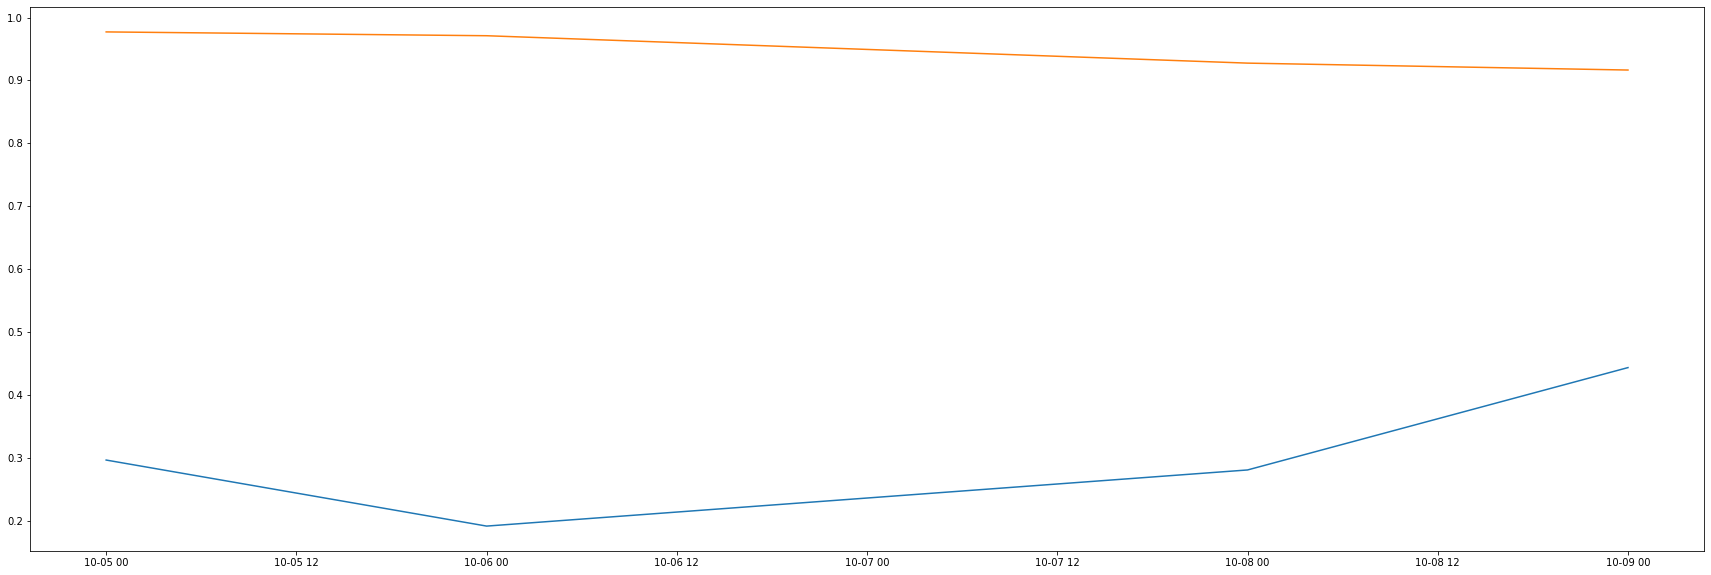

In [ ]:
subset = data_sens_reduced_all[["Date","Último_norm","STRENGTH_norm"]]
subset = subset[(subset["Date"]>'2010-10-03')]
subset = subset[(subset["Date"]<'2010-10-11')]

subset = subset.sort_values(by="Date")

plt.plot(subset["Date"], subset["Último_norm"])
plt.plot(subset["Date"], subset["STRENGTH_norm"])
plt.show()


In [ ]:
plt.hist(subset["Último_norm"])

In [ ]:
plt.hist(subset["STRENGTH_norm"])

In [ ]:
stats.pearsonr(subset["STRENGTH_norm"], subset["Último_norm"])

(-0.7040734813455234, 0.2959265186544766)

In [ ]:
plt.scatter(subset["Último_norm"], subset["STRENGTH_norm"], c ="blue")

plt.show()

In [ ]:
#subset.to_excel(r'/content/drive/MyDrive/RavenPack/testAmazon_REnorm.xlsx', index = False)

# Dataset Building

In [ ]:
companiesSP500 = pd.read_excel('/content/drive/MyDrive/RavenPack/TEST_100companies.xlsx')
companiesSP100 = pd.read_excel('/content/drive/MyDrive/RavenPack/TEST_100companies.xlsx', sheet_name="2010comp")
companiesSP500

In [ ]:
companies100 = pd.merge(companiesSP500,companiesSP100, how = "left", left_on = "Symbol", right_on = "GHC")
companies100

In [ ]:
companies100 = companies100.dropna().head(100)
companies100

In [ ]:
companies100.to_excel(r'/content/drive/MyDrive/RavenPack/companies100.xlsx', index = False)

# Network Graph

In [ ]:
edges = pd.read_csv('/content/drive/MyDrive/RavenPack/SP500_edgelist.txt', sep = " ")
edges_names = pd.read_csv('/content/drive/MyDrive/RavenPack/SP500_name_number_correspondence.txt', sep = "\t")

In [ ]:
network = pd.merge(edges, edges_names, how = "left", left_on = "A", right_on = "M")
network

,A,B,W,N,M
0,239,333,0.516972,JEC,239
1,239,180,0.635911,JEC,239
2,239,363,0.630253,JEC,239
3,80,333,0.587669,CAT,80
4,80,146,0.533932,CAT,80
...,...,...,...,...,...
841,186,407,0.642431,BEN,186
842,186,438,0.562564,BEN,186
843,438,144,0.578774,UNM,438
844,438,199,0.657153,UNM,438


In [ ]:
#FILTRO 100 selected companies
selected = pd.read_excel('/content/drive/MyDrive/RavenPack/companies100.xlsx')
network = network[network["N"].isin(selected.LISTING)]
len(network.N.unique())

array(['CAT', 'MMC', 'CB', 'MS', 'PNC', 'USB', 'PGR', 'TMO', 'WFC', 'ETN',
       'BAC', 'GD', 'JPM', 'ITW'], dtype=object)

In [ ]:
network.to_csv(r'/content/drive/MyDrive/RavenPack/Network.txt', index = False)